Notebook to examined 3.6 test runs

In [50]:
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
import datetime
import os
import froude
from salishsea_tools.nowcast import analyze

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6'
directory = 'base_aug'
file_part = 'SalishSea_1d_20030819_20030927_{}.nc'

dT = nc.Dataset(os.path.join(path,directory,file_part.format('grid_T')))
sal = dT.variables['vosaline'][:]
sal = np.ma.masked_values(sal,0)
deps = dT.variables['deptht'][:]
temp = dT.variables['votemper'][:]
temp = np.ma.masked_values(temp,0)
ssh = dT.variables['sossheig'][:]
n2 = dT.variables['buoy_n2'][:]
n2 = np.ma.masked_values(n2,0)
times = dT.variables['time_counter'][:]
time_origin = datetime.datetime.strptime(dT.variables['time_counter'].time_origin, '%Y-%m-%d %H:%M:%S')

dU = nc.Dataset(os.path.join(path,directory,file_part.format('grid_U')))
U = dU.variables['vozocrtx'][:]
U = np.ma.masked_values(U,0)
depsU=dU.variables['depthu'][:]

dW = nc.Dataset(os.path.join(path,directory,file_part.format('grid_W')))
avt = dW.variables['vert_eddy_diff'][:]
avt = np.ma.masked_values(avt,0)
avm = dW.variables['vert_eddy_visc'][:]
avm = np.ma.masked_values(avm,0)
depsW=dW.variables['depthw'][:]
diss = dW.variables['dissipation'][:]
diss = np.ma.masked_values(diss,0)




#Salinity

<matplotlib.colorbar.Colorbar instance at 0x7f74ea5fe5a8>

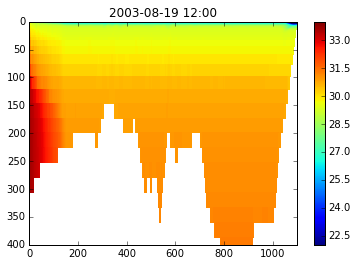

In [3]:
smin=22
smax=34
t=0
y=3
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))
plt.colorbar()

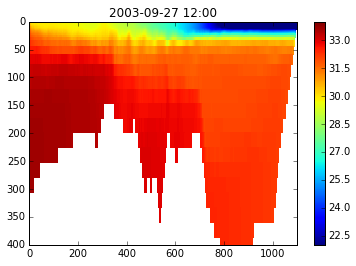

In [4]:
t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

winds stress still too strong? Surface layer is quite deep.

#Temperature

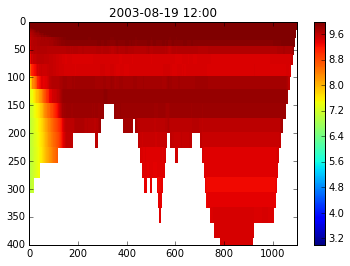

In [5]:
tmin=3; tmax=10
t=0
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

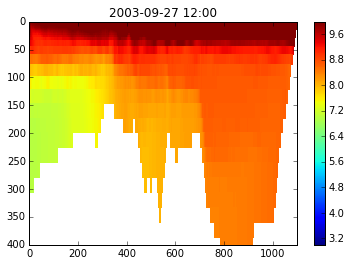

In [6]:

t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

May want to be more careful about how the water temperature of the river is specified. 

# U

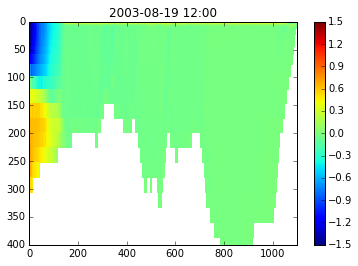

In [7]:
t=0
umin=-1.5
umax=1.5
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

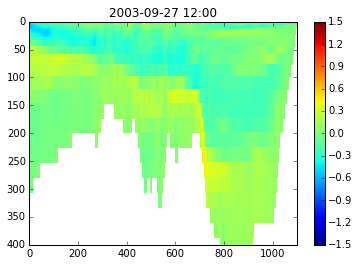

In [8]:
t=-1
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

#SSH and tides

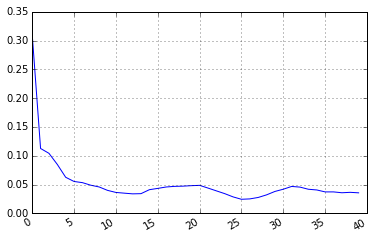

In [9]:
dates = [time_origin + datetime.timedelta(seconds= t) for t in times]
plt.plot(ssh[:,y,10])
fig=plt.gcf()
fig.autofmt_xdate()
plt.grid()

Daily averages...

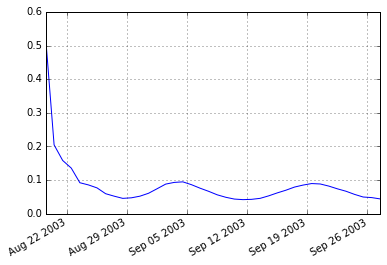

In [10]:
plt.plot(dates,ssh[:,y,150])
fig=plt.gcf()
fig.autofmt_xdate()
plt.grid()

<matplotlib.colorbar.Colorbar instance at 0x7f74cc35cfc8>

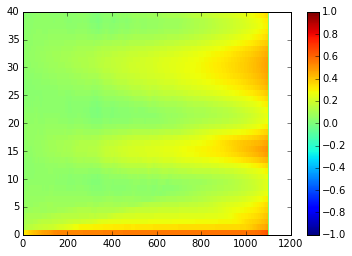

In [12]:
plt.pcolormesh(ssh[:,y,:],vmin=-1,vmax=1)
plt.colorbar()

Not so easy to determine spring/neap with daily averages. But I would guess this:

Spring = times 15/30
Neap = 10/20

Based on SSH at right end of domain.

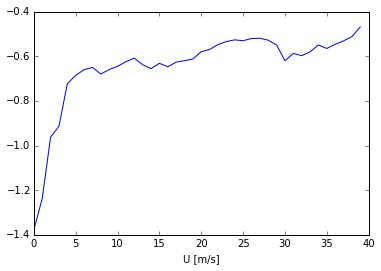

In [13]:
plt.plot(U[:,0,y,10])
plt.xlabel('U [m/s]')

In [14]:
print U.max()
print U.min()

0.840844
-2.70953


<matplotlib.colorbar.Colorbar instance at 0x7f74cc18b830>

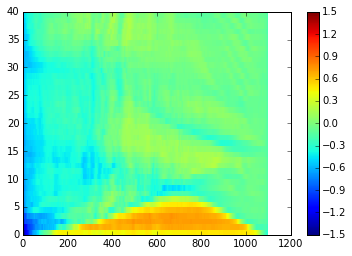

In [15]:
plt.pcolormesh(U[:,0,y,:],vmin=-1.5,vmax=1.5)
plt.colorbar()

#Plot at a time

In [16]:
def plot_variables(t):
    """Plot salinity, temperature, vertical eddy viscosity, vertical eddy diffusivity,
    buoyancy frequency, and U velocity at a chosen time. 
    
    t is an integer for model output index"""
    date =time_origin + datetime.timedelta(seconds = times[t])
    print date.strftime('%Y-%m-%d %H:%M')
    fig,axs = plt.subplots(3,2,figsize= (10,10))

    #salnity
    ax=axs[0,0]
    mesh=ax.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Salinity')

    #temp
    ax=axs[0,1]
    mesh=ax.pcolormesh(np.arange(0,temp.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Temperature')

    #diff
    dmin=0; dmax=100
    ax=axs[1,1]
    mesh=ax.pcolormesh(np.arange(0,avt.shape[3]),depsW,avt[t,:,y,:],vmin=dmin, vmax=dmax, cmap='hot')
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Vertical eddy diff')

    #visct
    ax=axs[1,0]
    mesh=ax.pcolormesh(np.arange(0,avm.shape[3]),depsW,avm[t,:,y,:],vmin=dmin, vmax=dmax,cmap='hot')
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Vertical eddy visc')

    #n2
    nmin=0; nmax=0.005
    ax=axs[2,0]
    mesh=ax.pcolormesh(np.arange(0,n2.shape[3]),deps,n2[t,:,y,:],vmin=nmin, vmax=nmax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Squared buoyancy frequency')

    #U
    ax=axs[2,1]
    mesh=ax.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin, vmax=umax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('U')
    
    return fig

Neap

2003-09-02 12:00


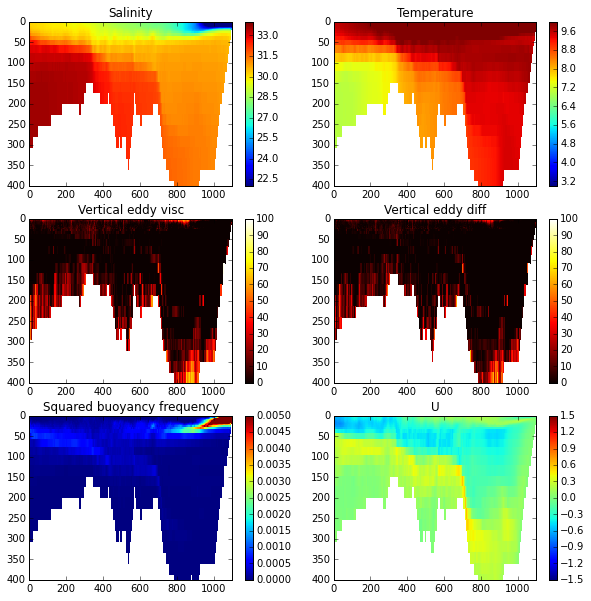

In [93]:
fig = plot_variables(14)

2003-09-15 12:00


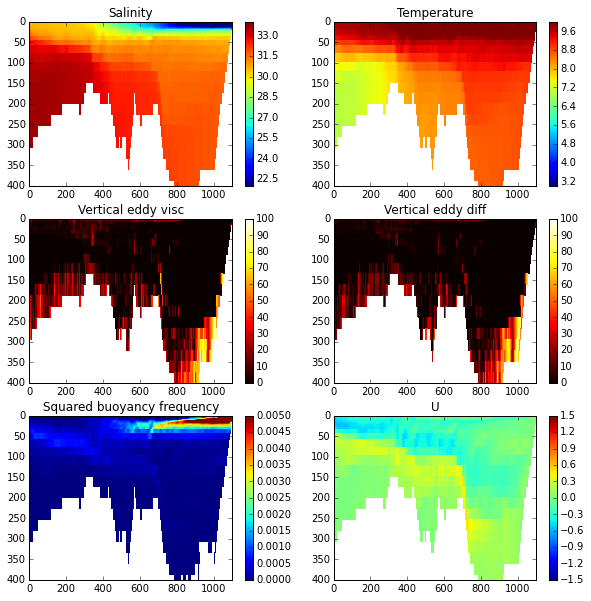

In [94]:
fig = plot_variables(27)

So much mixing in the basin when the water gets in there. 

Spring? 

2003-09-05 12:00


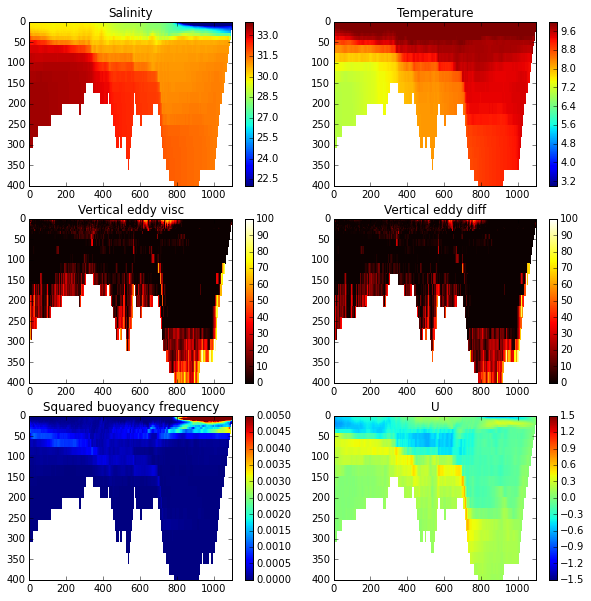

In [95]:
fig = plot_variables(17)

2003-09-19 12:00


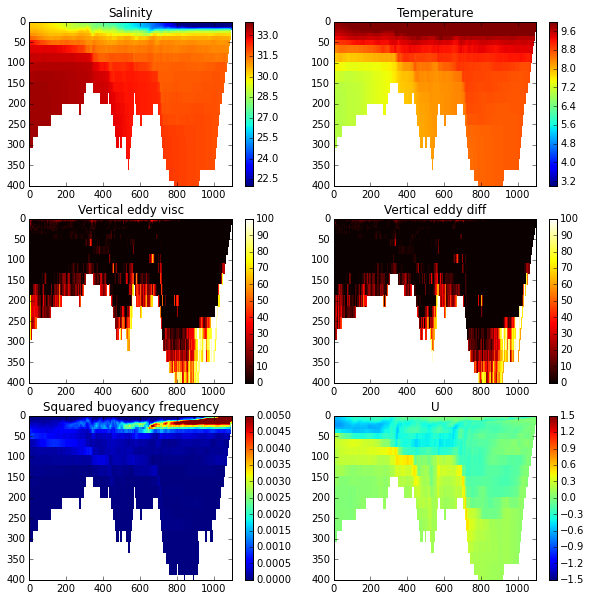

In [96]:
fig = plot_variables(31)

Lots of mixing at the fresh water front. 

Last time.

2003-09-27 12:00


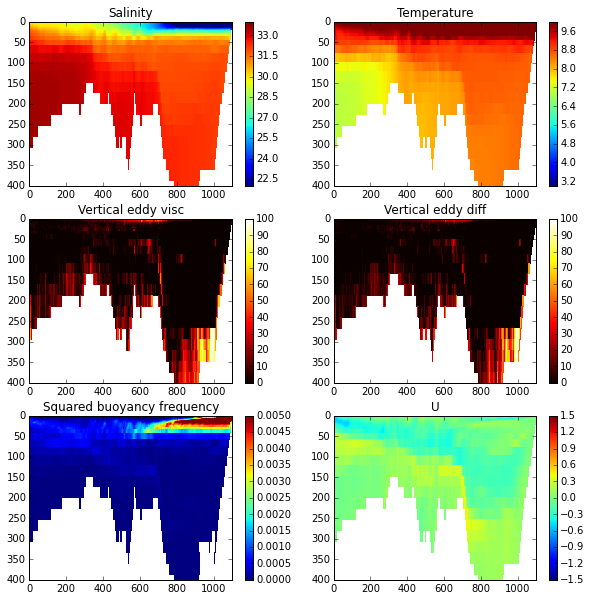

In [97]:
fig = plot_variables(39)

#Froude number

First, calculate density

In [31]:
reload(froude)

<module 'froude' from 'froude.py'>

In [32]:
rho = froude.calculate_density(temp, sal)

In [33]:
yslice=5

n2_slice = n2[:,:,yslice,:]
rho_slice = rho[:,:,yslice,:]
u_slice = U[:,:,yslice,:]

Frs,cs, uavgs,dates = froude.froude_time_series(n2_slice,rho_slice,u_slice,deps,depsU,times,time_origin)

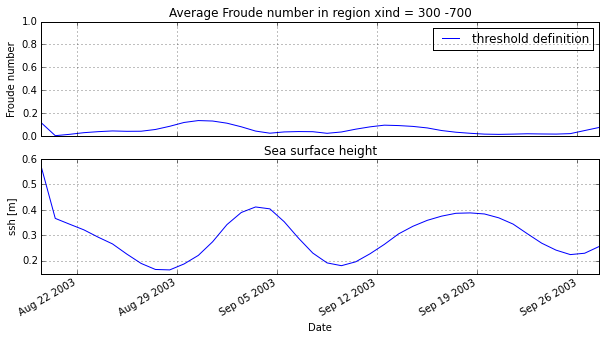

In [35]:
xmin=300; xmax=700;
fig,axs = plt.subplots(2,1,figsize=(10,5),sharex=True)
ax=axs[0]
ax.plot(dates,Frs, label = 'threshold definition')
ax.set_ylabel('Froude number')
ax.set_title('Average Froude number in region xind = {} -{}'.format(xmin,xmax))
ax.set_ylim([0,1])
ax.grid()
ax.legend(loc=0)
#compare to tides
ax=axs[1]
ax.plot(dates,ssh[:,5,1000])
ax.set_title('Sea surface height')
ax.set_ylabel('ssh [m]')
ax.set_xlabel('Date')
fig.autofmt_xdate()
ax.grid()

The Froude number is always less than one. Is this because my mixing is too high our because the daily averaged, depth-averaged U is not a good choice... Compare with 3D to find out. I already know our velocities are too small.

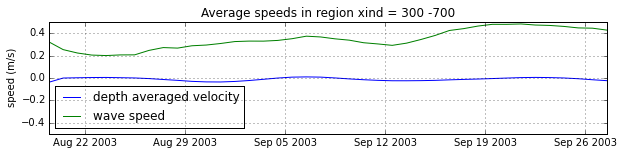

In [39]:
xmin=300; xmax=700;
fig,axs = plt.subplots(1,1,figsize=(10,2),sharex=True)
ax=axs
ax.plot(dates,uavgs, label = 'depth averaged velocity')
ax.plot(dates, cs, label = 'wave speed')
ax.set_ylabel('speed (m/s)')
ax.set_title('Average speeds in region xind = {} -{}'.format(xmin,xmax))
ax.set_ylim([-.5,.5])
ax.grid()
ax.legend(loc=0)

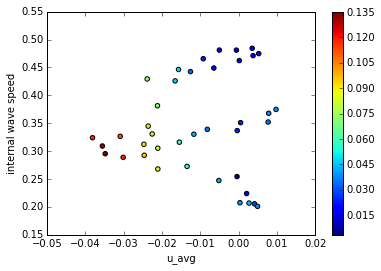

In [49]:
plt.scatter(np.array(uavgs),np.array(cs),c=np.array(Frs))
plt.colorbar()
plt.xlabel('u_avg')
plt.ylabel('internal wave speed')

I already know what the trend is.
* Higher c = lower Fr
* Higher Uavg = higher Fr

#Vertical Eddy Coeffcients

How does Fr compare with the vertical eddy coeffecients?

In [98]:
avm_slice = avm[:,1:,yslice,xmin:xmax+1] #note the entire surface is masked!
avt_slice = avt[:,1:,yslice,xmin:xmax+1]

avg_avt = np.ma.mean(analyze.depth_average(avt_slice,depsW[1:],depth_axis=1), axis=1)
avg_avm = np.ma.mean(analyze.depth_average(avm_slice,depsW[1:],depth_axis=1), axis=1)

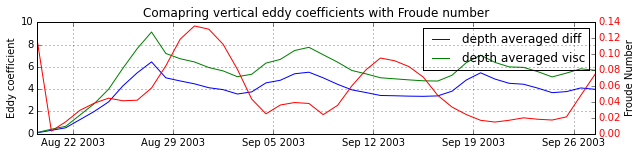

In [99]:
fig,axs = plt.subplots(1,1,figsize=(10,2))
ax=axs
ax.plot(dates,avg_avt, label = 'depth averaged diff')
ax.plot(dates,avg_avm, label = 'depth averaged visc')
ax.set_ylabel('Eddy coefficient')

ax2 = ax.twinx()
ax2.plot(dates, Frs, 'r')
ax2.set_ylabel('Froude Number')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

ax.set_title('Comapring vertical eddy coefficients with Froude number')
ax.grid()
ax.legend(loc=0)

* Spring/neap cycle is very clear in the eddy coeffcients.
* There is a lag between the neap and the minimum Fr.

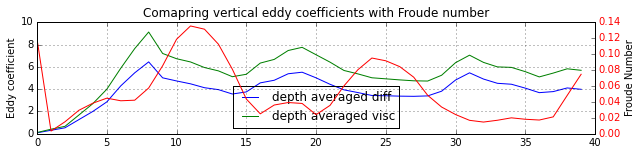

In [100]:
fig,axs = plt.subplots(1,1,figsize=(10,2))
ax=axs
ax.plot(avg_avt, label = 'depth averaged diff')
ax.plot(avg_avm, label = 'depth averaged visc')
ax.set_ylabel('Eddy coefficient')

ax2 = ax.twinx()
ax2.plot(Frs, 'r')
ax2.set_ylabel('Froude Number')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

ax.set_title('Comapring vertical eddy coefficients with Froude number')
ax.grid()
ax.legend(loc=0)

* Spring at t =17, 31
* Neaps at 14, 27